## train 시의 Input 데이터에 대한 설명입니다.

In [11]:
import os
import pandas as pd


# ../solution/sample_data/train 폴더 내에는 이미지 파일과 train.csv 파일이 존재합니다.
lst_in_train = os.listdir('../solution/sample_data/train')
# train 폴더 내의 파일들을 확인하시려면 아래 주석을 해제하시면 됩니다. 
# 다수의 png 파일과 이 파일들의 경로, 파일별 라벨을 담고 있는 train.csv파일이 보입니다.
# print(lst_in_train)


# train.csv는 샘플 데이터별로 데이터가 존재하는 경로와 데이터 별 라벨을 담고 있으며 이를 Ground Truth 파일이라고 지칭합니다. 
train_csv_path = '../solution/sample_data/train/train.csv'
train_csv = pd.read_csv(train_csv_path)
# 보시다 시피 image_path 컬럼에는 이미지 들의 경로, label 컬럼에는 이미지의 라벨이 담겨 있습니다. 
print(train_csv)



        image_path  label
0    ./10395_7.png      7
1    ./10175_2.png      2
2    ./10034_7.png      7
3    ./10397_8.png      8
4    ./10019_0.png      0
..             ...    ...
995   ./1072_9.png      9
996  ./10893_6.png      6
997  ./10278_1.png      1
998  ./10391_8.png      8
999  ./10897_1.png      1

[1000 rows x 2 columns]


## inference 시의 Input 데이터에 대한 설명입니다.

In [15]:
# ../solution/sample_data/test 의 경우에는 별도의 csv 파일이 존재하지 않으며 test에 쓰이는 이미지 파일들만 존재합니다.
lst_in_test = os.listdir('../solution/sample_data/test')

for fle in lst_in_test:
    print(fle)


1602_8.png
1121_6.png
1088_7.png
1476_5.png
1708_2.png
1013_8.png
1241_9.png
109_7.png
1589_7.png
119_1.png
1330_5.png
171_8.png
1705_2.png
1791_4.png
1520_1.png
1209_3.png
146_0.png
1354_9.png
1888_0.png
102_9.png
1128_2.png
1198_3.png
1613_9.png
1647_6.png
1454_4.png
1575_0.png
1487_2.png
1614_8.png
1857_6.png
1369_9.png
1661_4.png
1222_6.png
1267_5.png
1843_5.png
1388_9.png
141_3.png
1377_7.png
152_3.png
121_5.png
1082_8.png
110_5.png
1876_3.png
1807_9.png
1610_4.png
1431_1.png
1663_0.png
1426_2.png
1004_2.png
1083_1.png
147_0.png
1367_1.png
1549_7.png
1794_4.png
1458_0.png
1786_6.png
1424_5.png
1250_2.png
142_3.png
1558_4.png
1590_5.png
178_7.png
1457_2.png
1792_0.png
1425_0.png
108_2.png
1054_3.png
1000_2.png
1546_3.png
1853_1.png
1593_5.png
1199_9.png
1608_3.png
1010_8.png
1091_4.png
1464_4.png
1848_8.png
1156_3.png
1203_4.png
1775_1.png
1223_8.png
1639_9.png
1006_8.png
140_3.png
1038_4.png
1159_4.png
1346_2.png
1724_5.png
1767_8.png
1351_6.png
1461_9.png
1266_5.png
1677_6.png
11

# Setting tips

#### Ground Truth 데이터 경로 선택하기
Ground Truth(GT) 데이터와 이미지를 같은 폴더에 넣어주세요. ALO에서 GT파일과 이미지를 한 번에 분석환경으로 복사합니다. GT 데이터는 이미지 경로(`image_path`) 항목과 라벨(`label`) 항목으로 이루어져야 합니다. GT 데이터 내에 다른 항목이 있어도 분석에 사용되지 않습니다. `image_path`라는 항목명은 분석 시 변경할 수 있으나(이 때 실험계획서 내 `path_column`명을 동일하게 바꿔주세요) 솔루션 개발 완료 후 운영 시 반영되지 않기 때문에 가능하면 `image_path`로 작성해주세요. 이 때 이미지의 사이즈는 모든 데이터에 대해 일정한 것이 좋습니다. 만약 다른 사이즈의 이미지가 있는 경우 성능이 떨어질 수 있으며 가능하면 crop을 하거나 resize를 통해 미리 일정한 사이즈로 유지하는게 좋습니다.

#### 모델 선택하기
현재 지원되는 모델은 `mobilenetv1`과 `high_resolution`의 두 가지 있습니다. `mobilenetv1`은 기본 모델로 어떤 데이터에 대해서도 안정적으로 학습/추론이 가능합니다. 경량화 모델이기 때문에 `resize_shape`은 `224, 224, 3` 형태가 권장됩니다. 더 높은 해상도를 원하는 경우 `high_resolution` 모델을 선택하고 `resize_shape` parameter를 수정해주세요. 

#### 데이터 증강 기법 선택하기 
데이터가 충분하지 않 은 경우(image 당 1000장 이하) rand_augmentation 기능을 True로 설정하면 증강기법을 통해 더 다양하고 많은 데이터로 학습할 수 있습니다. 이 때 과제의 유형과 증강 기법을 살펴보고 과제에 적합하지 않은 변환은 제외해주세요.(자세한 설정 방법은 하단의 Train pipeline: Add data augmentation을 참고해주세요.) 

#### 성능과 리소스 절감을 위한 설명
데이터의 양이 많고 복잡한 문제인 경우 epochs를 늘리면 성능이 향상됩니다. 만약 epochs를 너무 길게 설정하여 과최적화가 우려되더라도 checkpoint기능을 통해 학습 중 검증 데이터의 성능이 가장 좋은 모델을 사용하기 때문에 문제가 발생하지 않습니다. 학습 데이터 수가 많고 학습 리소스가 충분한 경우(메모리와 GPU 메모리), batch_size를 늘리면 빠르게 학습하고 좋은 성능의 모델이 생성됩니다. 만약 데이터 수가 아주 많지만 정형화되어 있어 소수만 학습하고 대부분을 검증 데이터로 활용하고 싶은 경우 `train_ratio`를 낮추면 됩니다.

#### 이미지 내 추론 근거 영역 확인하기(XAI 설명)
만약 추론 시 어떤 영역을 근거로 하여 해당 라벨을 예측했는지 알고 싶다면 do_xai 옵션을 True로 바꾸면 됩니다. OK/NG와 같이 binary로 학습하고 NG에 대한 근거만 확인하고 싶다면 xai_class를 NG로 작성하시면 됩니다. 만약 XAI 민감도가 지나치게 낮아 영역이 거의 표시되지 않은 경우 mask_threshold를 낮추면 더 넓은 영역이 표시됩니다. 더 깊은 층을 분석하여 정확한 결과를 알고 싶은 경우 layer_index를 늘리면 모델에서 더 깊은 층을 활용하여 XAI 결과를 도출하지만 추론 시 리소스가 많이 소요됩니다.

## train 후의 output 에 대한 설명입니다

In [36]:
# train이 끝난 후 train에 쓰인 데이터에 대한 prediction을 확인할 수 있는 csv 파일 경로입니다.
train_output_csv_path = '../train_artifacts/output/prediction.csv'
train_output_csv = pd.read_csv(train_output_csv_path,index_col=0)

# prediction.csv 의 컬럼들은 다음과 같습니다.
print(train_output_csv.columns)
# 각 컬럼에 대한 설명은 다음과 같습니다.
# iamge_path == 각 이미지가 존재하는 경로
# label == 각 이미지의 실제 라벨
# pred_label == 모델이 predict한 각 이미지별 라벨
# prob_N == 모델이 추론한, 각 이미지가 클래스 N 에 속할 확률
print('=======================================================================================')
print('=======================================================================================')
print('=======================================================================================')
# prediction.csv 예시는 아래와 같습니다.
print(train_output_csv)
print('=======================================================================================')
print('=======================================================================================')
print('=======================================================================================')



Index(['image_path', 'label', 'pred_label', 'prob_0', 'prob_1', 'prob_2',
       'prob_3', 'prob_4', 'prob_5', 'prob_6', 'prob_7', 'prob_8', 'prob_9'],
      dtype='object')
                                            image_path  label  pred_label  \
0    /home/jovyan/forCv/sampleRunDir/cv_test/input/...      7           7   
1    /home/jovyan/forCv/sampleRunDir/cv_test/input/...      2           2   
2    /home/jovyan/forCv/sampleRunDir/cv_test/input/...      7           7   
3    /home/jovyan/forCv/sampleRunDir/cv_test/input/...      8           8   
4    /home/jovyan/forCv/sampleRunDir/cv_test/input/...      0           0   
..                                                 ...    ...         ...   
995  /home/jovyan/forCv/sampleRunDir/cv_test/input/...      9           9   
996  /home/jovyan/forCv/sampleRunDir/cv_test/input/...      6           0   
997  /home/jovyan/forCv/sampleRunDir/cv_test/input/...      1           1   
998  /home/jovyan/forCv/sampleRunDir/cv_test/input/...  

In [40]:
extra_output_path  ='../train_artifacts/extra_output/train'
# confusion mattrix 는 extra_output 폴더내에 존재합니다.
confusion_matrix_path = os.path.join(extra_output_path,'confusion.csv')
confusion_matrix = pd.read_csv(confusion_matrix_path,index_col=0)
# extra_output/train 폴더내의 confusion.csv 을 열어보시면 confusion matrix 를 확인하실 수 있습니다.
# 행은 실제 label, 열은 모델에 의한 predicted label 입니다.
print(confusion_matrix)

   pred_0  pred_1  pred_2  pred_3  pred_4  pred_5  pred_6  pred_7  pred_8  \
0      89       0       1       0       0       0       0       0       4   
1       1      97       0       0       0       0       0       0       0   
2       1       0      95       0       0       0       0       1       5   
3       3       0       3      94       1       0       0       0       0   
4       1       0      14       8      64       0       4       0       4   
5       0       0       0       0       0      85       0       4       0   
6      21       0      19       1       1       0      59       0       4   
7       0       0       0       0       0       4       0     106       0   
8       0       0       0       0       0       0       0       7      89   
9       0       0       0       0       0       0       0       1       0   

   pred_9  
0       0  
1       0  
2       0  
3       0  
4       0  
5       4  
6       1  
7       1  
8       0  
9     103  


In [39]:
# extra_output 내 eval.json에서 설정, epcoh 별 loss 와 accuracy, 각 클래스별 precision,recall,f1 score 등의 정보를 확인하실 수 있습니다.
import json
eval_json_path = os.path.join(extra_output_path,'eval.json')
with open(eval_json_path,'r') as F:
    eval_json = json.load(F)

from pprint import pprint
pprint(eval_json)

{'classification_report': {'0': {'f1-score': 0.8476190476190476,
                                 'precision': 0.7672413793103449,
                                 'recall': 0.9468085106382979,
                                 'support': 94.0},
                           '1': {'f1-score': 0.9948717948717949,
                                 'precision': 1.0,
                                 'recall': 0.9897959183673469,
                                 'support': 98.0},
                           '2': {'f1-score': 0.811965811965812,
                                 'precision': 0.7196969696969697,
                                 'recall': 0.9313725490196079,
                                 'support': 102.0},
                           '3': {'f1-score': 0.9215686274509803,
                                 'precision': 0.912621359223301,
                                 'recall': 0.9306930693069307,
                                 'support': 101.0},
                           '4': {'f

## inference 후의 output에 대한 설명입니다

In [47]:
# 추론 데이터에 대한 prediction 결과는 inference_artifact/output 폴더의 prediction.csv에서 확인하실 수 있습니다. 
inference_output_csv_path = '../inference_artifacts/output/prediction.csv'
inference_output_csv = pd.read_csv(inference_output_csv_path,index_col=0)

# prediction.csv 의 컬럼들은 위에서 보여드린 train_artifacts/output/prediction.csv의 결과와 같습니다.
print(inference_output_csv.columns)
# 각 컬럼에 대한 설명은 다음과 같습니다.
# iamge_path == 각 이미지가 존재하는 경로
# label == 각 이미지의 실제 라벨
# pred_label == 모델이 predict한 각 이미지별 라벨
# prob_N == 모델이 추론한, 각 이미지가 클래스 N 에 속할 확률
print('=======================================================================================')
print('=======================================================================================')
print('=======================================================================================')
# prediction.csv 예시는 아래와 같습니다.
print(inference_output_csv)
print('=======================================================================================')
print('=======================================================================================')
print('=======================================================================================')

Index(['image_path', 'label', 'pred_label', 'prob_0', 'prob_1', 'prob_2',
       'prob_3', 'prob_4', 'prob_5', 'prob_6', 'prob_7', 'prob_8', 'prob_9',
       'uncertainty'],
      dtype='object')
                                            image_path  label  pred_label  \
0    /home/jovyan/forCv/sampleRunDir/cv_test/input/...      0           8   
1    /home/jovyan/forCv/sampleRunDir/cv_test/input/...      0           6   
2    /home/jovyan/forCv/sampleRunDir/cv_test/input/...      0           7   
3    /home/jovyan/forCv/sampleRunDir/cv_test/input/...      0           5   
4    /home/jovyan/forCv/sampleRunDir/cv_test/input/...      0           2   
..                                                 ...    ...         ...   
995  /home/jovyan/forCv/sampleRunDir/cv_test/input/...      0           9   
996  /home/jovyan/forCv/sampleRunDir/cv_test/input/...      0           6   
997  /home/jovyan/forCv/sampleRunDir/cv_test/input/...      0           1   
998  /home/jovyan/forCv/sampleRunD

../inference_artifacts/extra_output/inference/xai_result/1212_0_xai_class0.jpg


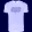

In [63]:
from PIL import Image
# import matplotlib.pyplot as plt

# 현재 cv 컨텐츠는 xai 기능을 지원하며 xai에 대한 결과가 아래 경로에 저장되게 됩니다.
inference_output_img_path = '../inference_artifacts/extra_output/inference/xai_result'
xai_img_lst = os.listdir(inference_output_img_path)
#print(xai_img_lst)

# xai 결과 예시는 아래 이미지와 같습니다.
xai_example_img_path = os.path.join(inference_output_img_path,xai_img_lst[0])
xai_example_img = Image.open(xai_example_img_path)

display(xai_example_img)



In [73]:
import yaml

# inference에 대한 inference_summary를 통해 모델의 확실도 등을 확인하실 수 있습니다.
# inference_summary는 아래 경로에 존재합니다.
inference_summary_path = '../inference_artifacts/score/inference_summary.yaml'

with open(inference_summary_path) as F:
    inference_summary_yaml = yaml.load(F,Loader=yaml.FullLoader)

# 현재 확실도(score)는 1- 섀년 엔트로피로 정의되고 있습니다.
from pprint import pprint
pprint(inference_summary_yaml)

{'date': '2024-05-13 10:39:20',
 'file_path': '',
 'note': '',
 'probability': {},
 'result': '0: 141, 7: 139, 6: 112, ...',
 'score': 0.74,
 'version': ''}


# 